In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_total = pd.read_csv('cases-brazil-states.csv')
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [3]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df_total['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Obitos')

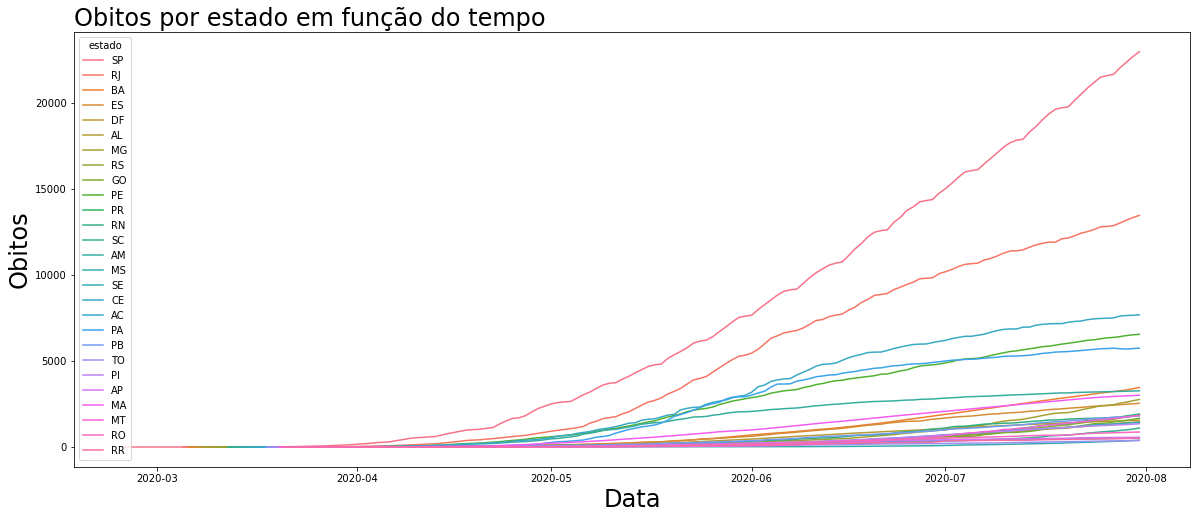

In [4]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)

fig.set_title('Obitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Obitos', fontsize=24)

In [5]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


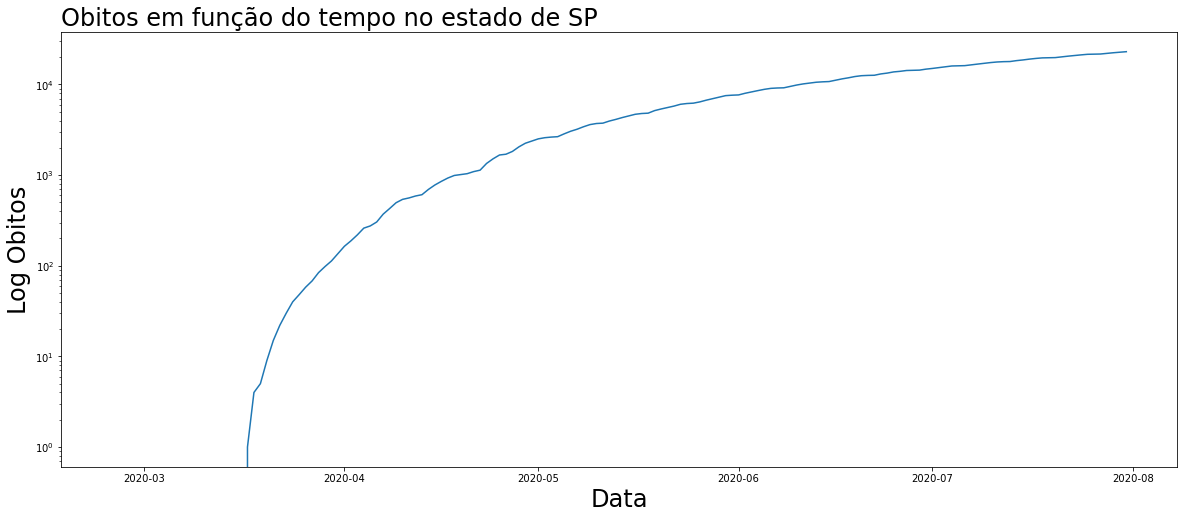

In [6]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', data=df_sp)

fig.set_title('Obitos em função do tempo no estado de SP', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Obitos', fontsize=24)

fig.set_yscale('log')

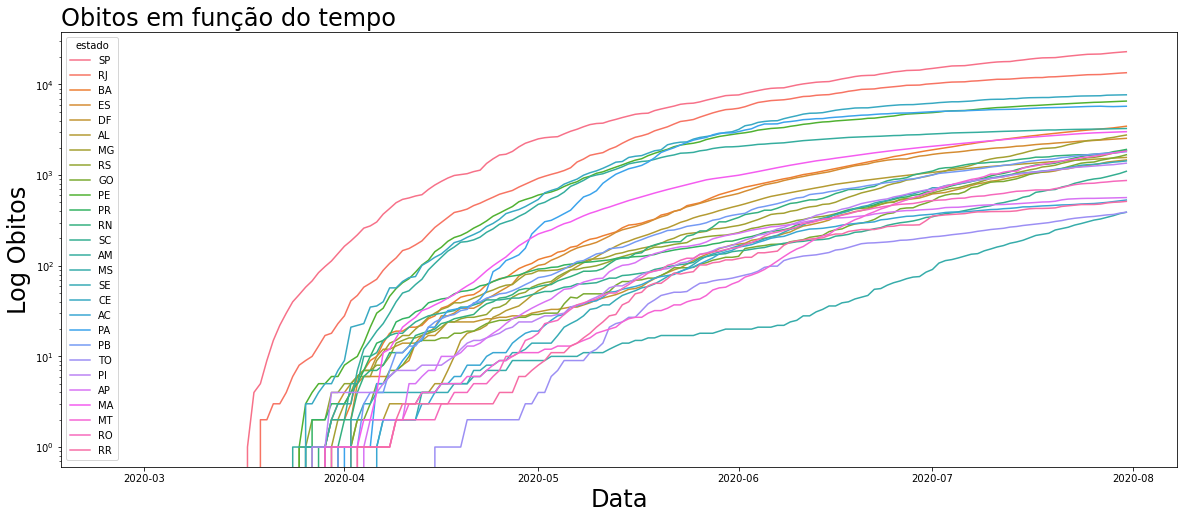

In [7]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)

fig.set_title('Obitos em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Obitos', fontsize=24)

fig.set_yscale('log')

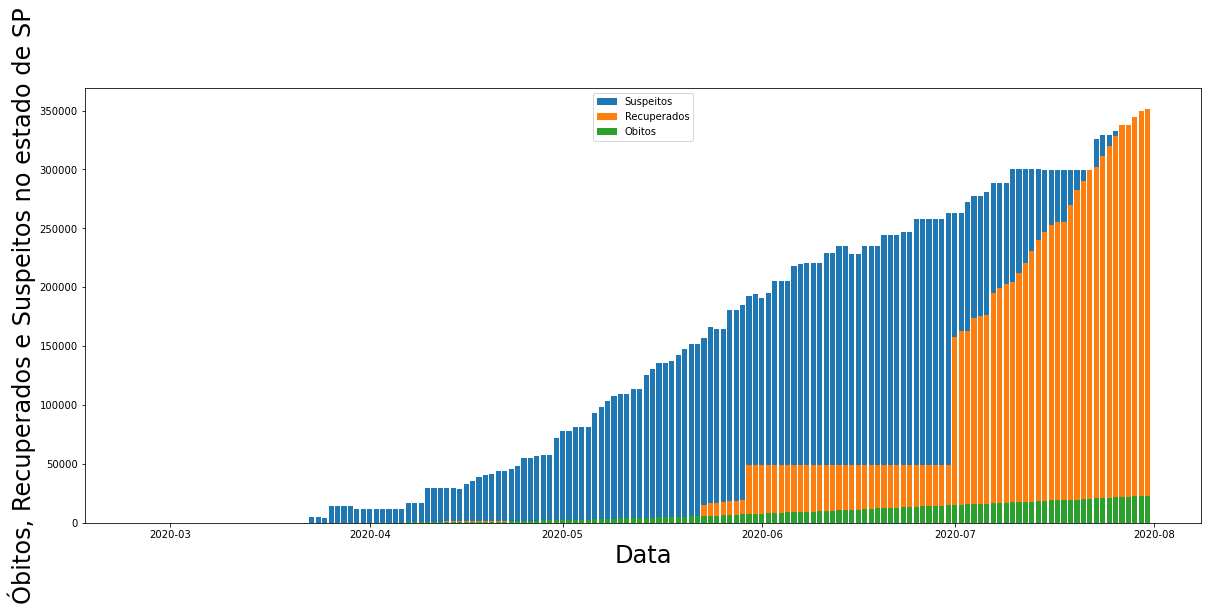

In [8]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp['data'], df_sp['suspeitos'], label='Suspeitos')
plt.bar(df_sp['data'], df_sp['recuperados'], label='Recuperados')
plt.bar(df_sp['data'], df_sp['Obitos'], label='Obitos')

plt.xlabel('Data', fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de SP', fontsize=24, rotation=90)
plt.legend()
plt.show()

In [9]:
def plotar_linha(titulo, xlabel, ylabel, x, y, dataset, hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20, rotation=90)

In [10]:
def plotar_barra(titulo, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x], dataset[y])
    plt.title(titulo, loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20, rotation=90)

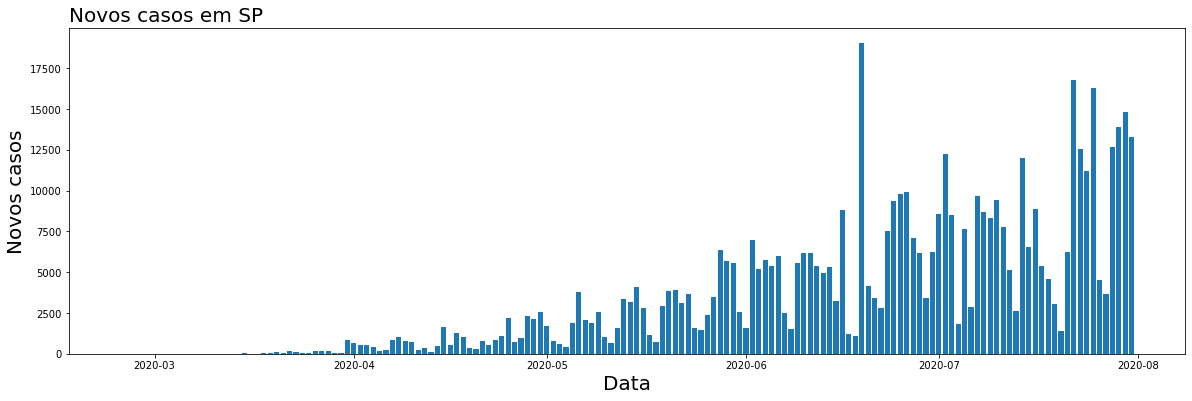

In [11]:
plotar_barra('Novos casos em SP', 'Data', 'Novos casos', 'data', 'novosCasos', df_sp)

In [12]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp['aceleracaoRecuperados'] = df_sp['recuperados'].diff()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN


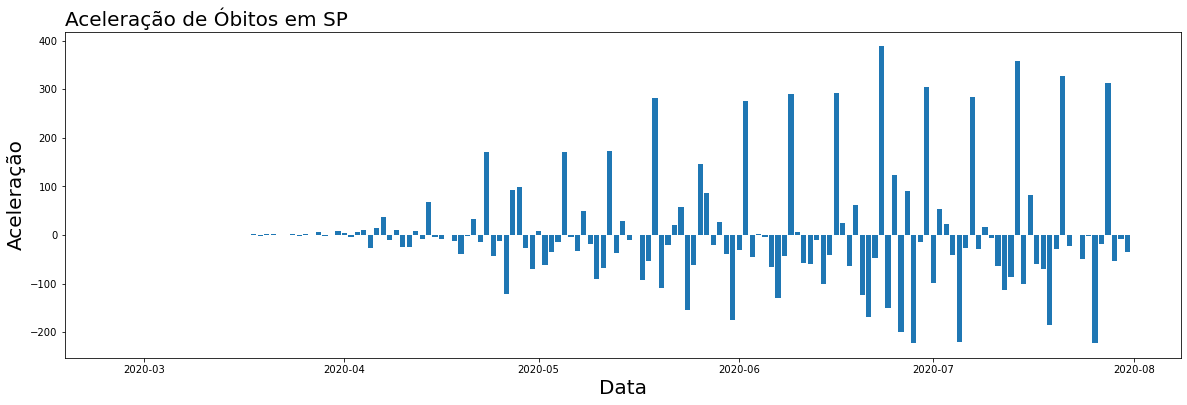

In [13]:
plotar_barra('Aceleração de Óbitos em SP', 'Data', 'Aceleração', 'data', 'aceleracaoObitos', df_sp)

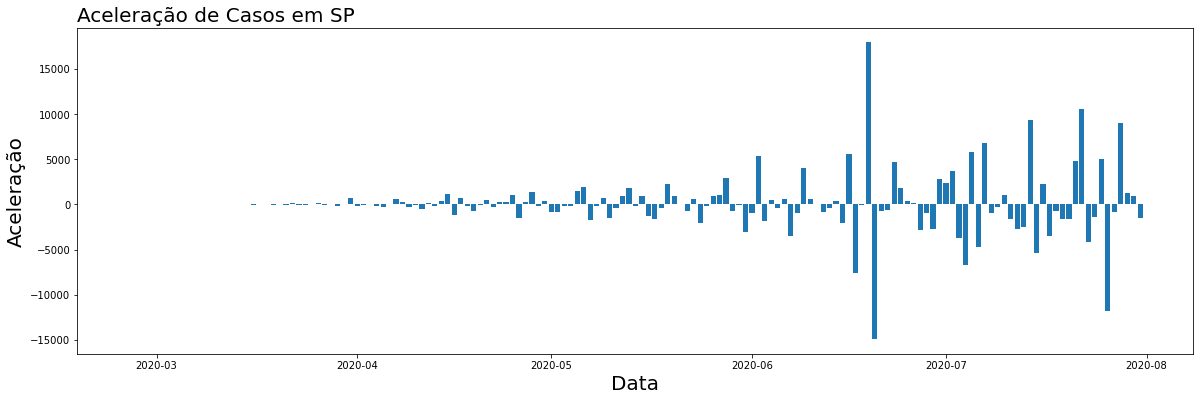

In [14]:
plotar_barra('Aceleração de Casos em SP', 'Data', 'Aceleração', 'data', 'aceleracaoCasos', df_sp)

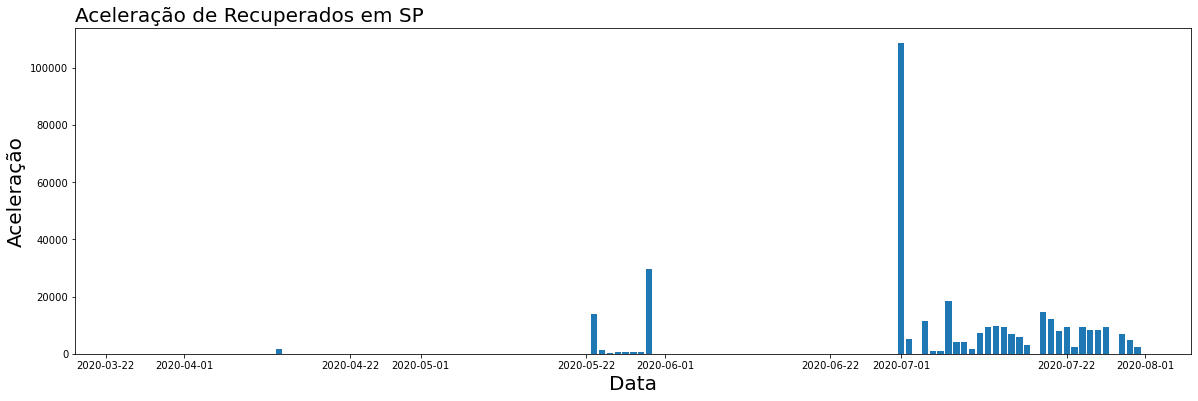

In [15]:
plotar_barra('Aceleração de Recuperados em SP', 'Data', 'Aceleração', 'data', 'aceleracaoRecuperados', df_sp)

In [16]:
df_sp['mediaObitos'] = df_sp['novosObitos'].rolling(window=7, center=False).mean()
df_sp['mediaObitos_14'] = df_sp['novosObitos'].rolling(window=14, center=False).mean()

<BarContainer object of 158 artists>

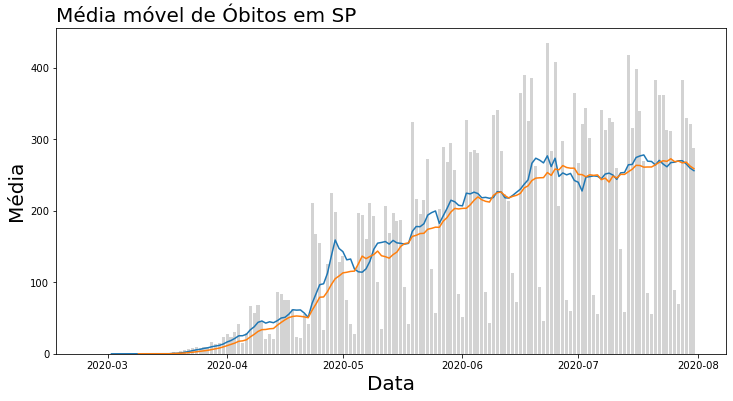

In [17]:
plotar_linha('Média móvel de Óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos', df_sp, None)
plotar_linha('Média móvel de Óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos_14', df_sp, None)
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')